# HW05: Линейные модели и честный ML-эксперимент
**Студент:** Чайка Никита Валентинович  
**Группа:** ИНБО-10-22

## 1. Загрузка данных и первичный анализ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    accuracy_score, 
    roc_auc_score, 
    roc_curve, 
    precision_recall_curve,
    auc,
    classification_report,
    confusion_matrix
)

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
sns.set(style='whitegrid')

In [2]:
file_path = '../../seminars/S05-hw-dataset.csv'
df = pd.read_csv(file_path)

print(f"Данные успешно загружены. Размер: {df.shape}")

Данные успешно загружены. Размер: (3000, 17)


In [3]:
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [5]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [6]:
# Анализ распределения целевой переменной
target_counts = df['default'].value_counts()
target_percentages = df['default'].value_counts(normalize=True) * 100

print("Распределение целевой переменной 'default':")
print(target_counts)
print("\nДоли классов:")
print(f"Класс 0 (нет дефолта): {target_percentages[0]:.2f}%")
print(f"Класс 1 (есть дефолт): {target_percentages[1]:.2f}%")

Распределение целевой переменной 'default':
default
0    1769
1    1231
Name: count, dtype: int64

Доли классов:
Класс 0 (нет дефолта): 58.97%
Класс 1 (есть дефолт): 41.03%


### Анализ качества данных

На основе проведенного анализа можно сделать следующие выводы:

1. **Размер датасета**: 3000 объектов и 17 признаков

2. **Типы данных**:
   - 14 числовых признаков типа int64
   - 2 числовых признака типа float64 (вещественные числа)
   - Все признаки имеют подходящий тип данных для задачи классификации

3. **Пропущенные значения**:
   - Общее количество пропусков минимально

4. **Баланс классов**:
   - Класс 0 (отсутствие дефолта): 58.97%
   - Класс 1 (наличие дефолта): 41.03%
   - Задача не является идеально сбалансированной, но и не экстремально перекошенной
   - Разница между классами составляет около 20%, что приемлемо для обучения моделей

5. **Аномальные значения**:
   - В столбце `checking_balance` есть отрицательные значения (минимум: -3000), что может быть нормально для банковских счетов (долги)
   - В столбце `num_late_payments` максимальное значение равно 14, что может указывать на проблемы с платежной дисциплиной

6. **Статистические характеристики**:
   - Средний возраст клиентов: 45 лет
   - Средний доход: 69658 условных единиц
   - Средний кредитный скоринг: 649.29 (выше среднего)
   - Среднее отношение долга к доходу: 0.28 (28% дохода идет на погашение долгов)

## 2. Подготовка признаков и таргета

In [7]:
# Подготовка признаков и таргета
X = df.drop(['default', 'client_id'], axis=1)
y = df['default']

print(f"Матрица признаков X: {X.shape}")
print(f"Вектор таргета y: {y.shape}")
print("\nПризнаки в матрице X:")
print(X.dtypes)

Матрица признаков X: (3000, 15)
Вектор таргета y: (3000,)

Признаки в матрице X:
age                                 int64
income                              int64
years_employed                      int64
credit_score                        int64
debt_to_income                    float64
num_credit_cards                    int64
num_late_payments                   int64
has_mortgage                        int64
has_car_loan                        int64
savings_balance                     int64
checking_balance                    int64
region_risk_score                 float64
phone_calls_to_support_last_3m      int64
active_loans                        int64
customer_tenure_years               int64
dtype: object


### Проверка диапазонов признаков

Проверим несколько ключевых признаков на наличие аномальных значений:

In [8]:
# Проверка диапазонов ключевых признаков

# 1. debt_to_income
debt_min = df['debt_to_income'].min()
debt_max = df['debt_to_income'].max()
print("1. debt_to_income:")
print(f"    Минимум: {debt_min}")
print(f"    Максимум: {debt_max}")
print("Все значения " + ("в допустимом диапазоне [0, 1]" if debt_min >= 0 and debt_max <= 1 else "вне допустимого диапазона"))
print()

# 2. credit_score
credit_min = df['credit_score'].min()
credit_max = df['credit_score'].max()
print("2. credit_score:")
print(f"    Минимум: {credit_min}")
print(f"    Максимум: {credit_max}")
print("Все значения " + ("в допустимом диапазоне [300, 850]" if credit_min >= 300 and credit_max <= 850 else "вне допустимого диапазона"))
print()

# 3. region_risk_score
region_min = df['region_risk_score'].min()
region_max = df['region_risk_score'].max()
print("3. region_risk_score:")
print(f"    Минимум: {region_min}")
print(f"    Максимум: {region_max}")
print("Все значения " + ("в допустимом диапазоне [0, 1]" if region_min >= 0 and region_max <= 1 else "вне допустимого диапазона"))
print()

# 4. age
age_min = df['age'].min()
age_max = df['age'].max()
print("4. age:")
print(f"    Минимум: {age_min}")
print(f"    Максимум: {age_max}")
print(("Все значения в разумном диапазоне (18-100 лет)" if age_min >= 18 and age_max <= 100 else f"Значение {age_min} лет выглядит аномально для банковских данных"))
print()

# 5. savings_balance
savings_min = df['savings_balance'].min()
savings_max = df['savings_balance'].max()
print("5. savings_balance:")
print(f"    Минимум: {savings_min}")
print(f"    Максимум: {savings_max}")
print(("  Все значения неотрицательные" if savings_min >= 0 else "Отрицательное значение может быть аномалией"))

1. debt_to_income:
    Минимум: 0.0061471149847966
    Максимум: 0.878343349584274
Все значения в допустимом диапазоне [0, 1]

2. credit_score:
    Минимум: 402
    Максимум: 850
Все значения в допустимом диапазоне [300, 850]

3. region_risk_score:
    Минимум: 0.0011480532639611
    Максимум: 0.9617329449691724
Все значения в допустимом диапазоне [0, 1]

4. age:
    Минимум: 21
    Максимум: 69
Все значения в разумном диапазоне (18-100 лет)

5. savings_balance:
    Минимум: 0
    Максимум: 75237
  Все значения неотрицательные


## 3. Train/Test-сплит и бейзлайн-модель

Разделение данных на обучающую и тестовую выборки

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("Размеры выборок:")
print(f"    Обучающая выборка X_train: {X_train.shape}")
print(f"    Тестовая выборка X_test: {X_test.shape}")
print(f"    Обучающая выборка y_train: {y_train.shape}")
print(f"    Тестовая выборка y_test: {y_test.shape}")
print()

test_class_balance = y_test.value_counts(normalize=True)
print("Баланс классов в тестовой выборке:")
print(test_class_balance.rename('proportion'))

Размеры выборок:
    Обучающая выборка X_train: (2400, 15)
    Тестовая выборка X_test: (600, 15)
    Обучающая выборка y_train: (2400,)
    Тестовая выборка y_test: (600,)

Баланс классов в тестовой выборке:
default
0    0.59
1    0.41
Name: proportion, dtype: float64


Бейзлайн-модель (DummyClassifier)

Стратегия: most_frequent (предсказываем самый частый класс)

In [10]:
# Обучение бейзлайн-модели
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)

# Предсказания
dummy_pred = dummy_clf.predict(X_test)
dummy_pred_proba = dummy_clf.predict_proba(X_test)[:, 1]

# Метрики качества
dummy_accuracy = accuracy_score(y_test, dummy_pred)
dummy_roc_auc = roc_auc_score(y_test, dummy_pred_proba)
dummy_confusion = confusion_matrix(y_test, dummy_pred)
dummy_report = classification_report(y_test, dummy_pred)

print("Метрики качества:")
print(f"    Accuracy (точность): {dummy_accuracy:.4f}")
print(f"    ROC-AUC: {dummy_roc_auc:.4f}\n")

print("Матрица ошибок:")
print(dummy_confusion)
print()

print("Классификационный отчет:")
print(dummy_report)

Метрики качества:
    Accuracy (точность): 0.5900
    ROC-AUC: 0.5000

Матрица ошибок:
[[354   0]
 [246   0]]

Классификационный отчет:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       354
           1       0.00      0.00      0.00       246

    accuracy                           0.59       600
   macro avg       0.29      0.50      0.37       600
weighted avg       0.35      0.59      0.44       600



c:\Users\nikita\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\nikita\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\nikita\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

### Анализ бейзлайн-модели

Результаты бейзлайн-модели (`DummyClassifier` со стратегией "most_frequent") показывают:

1. **Accuracy (точность)**: 0.5900 (59%)
   - Модель просто всегда предсказывает класс 0 (самый частый класс)

2. **ROC-AUC**: 0.5000
   - Значение ROC-AUC равно 0.5, что соответствует случайному угадыванию
   - Это подтверждает, что модель не обладает предсказательной способностью

3. **Матрица ошибок**:
   - Все 354 объекта класса 0 предсказаны верно
   - Все 246 объектов класса 1 предсказаны неверно (ложные отрицания)

4. **Классификационный отчет**:
   - Для класса 0: recall = 1.00 (все объекты класса 0 найдены), precision = 0.59
   - Для класса 1: recall = 0.00 (ни один объект класса 1 не найден), precision = 0.00
   - F1-score для класса 1 равен 0.00, что подтверждает полное отсутствие способности находить дефолты

5. **Полезность бейзлайна**:
   - Бейзлайн устанавливает базовую линию для сравнения
   - Любая полезная модель должна превосходить эти результаты
   - Особенно важно улучшить recall для класса 1 (дефолты), так как их пропуск может быть дорогостоящим

## 4. Логистическая регрессия и подбор гиперпараметров

In [12]:
# Создание пайплайна с предобработкой и логистической регрессией

# Определяем числовые и категориальные признаки
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Создаем предобработчик для числовых признаков
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Создаем общий предобработчик
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

# Создаем полный пайплайн
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

# Параметры для подбора
param_grid = {
    'logreg__C': [0.01, 0.1, 1.0, 10.0]  # Параметр регуляризации
}

# Поиск лучших параметров
grid_search = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=3, 
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший ROC-AUC на кросс-валидации: {grid_search.best_score_:.3f}")

Лучшие параметры: {'logreg__C': 10.0}
Лучший ROC-AUC на кросс-валидации: 0.862


Лучшая модель логистической регрессии

In [13]:
best_model = grid_search.best_estimator_

# Предсказания
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Метрики качества
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
confusion_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Метрики качества:")
print(f"- Accuracy (точность): {accuracy:.4f}")
print(f"- ROC-AUC: {roc_auc:.4f}\n")

print("Матрица ошибок:")
print(confusion_mat)
print()

print("Классификационный отчет:")
print(class_report)

Метрики качества:
- Accuracy (точность): 0.8000
- ROC-AUC: 0.8756

Матрица ошибок:
[[310  44]
 [ 76 170]]

Классификационный отчет:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       354
           1       0.79      0.69      0.74       246

    accuracy                           0.80       600
   macro avg       0.80      0.78      0.79       600
weighted avg       0.80      0.80      0.80       600



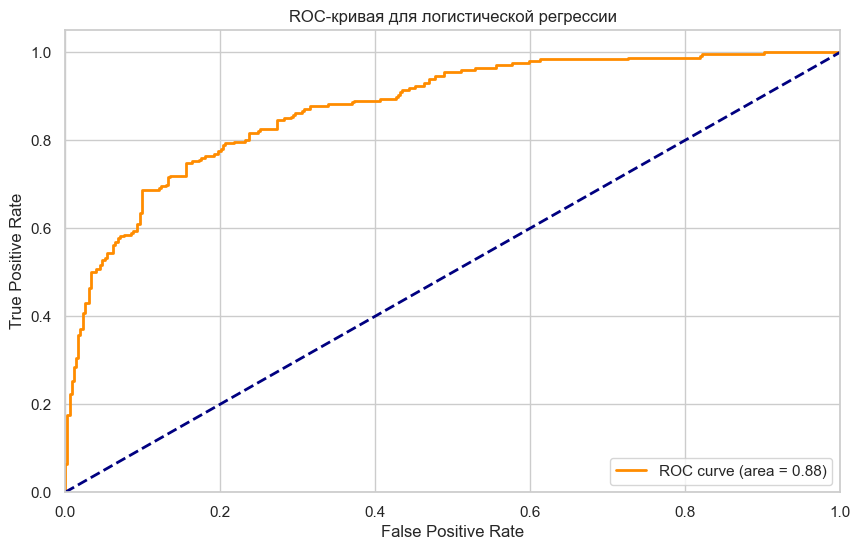

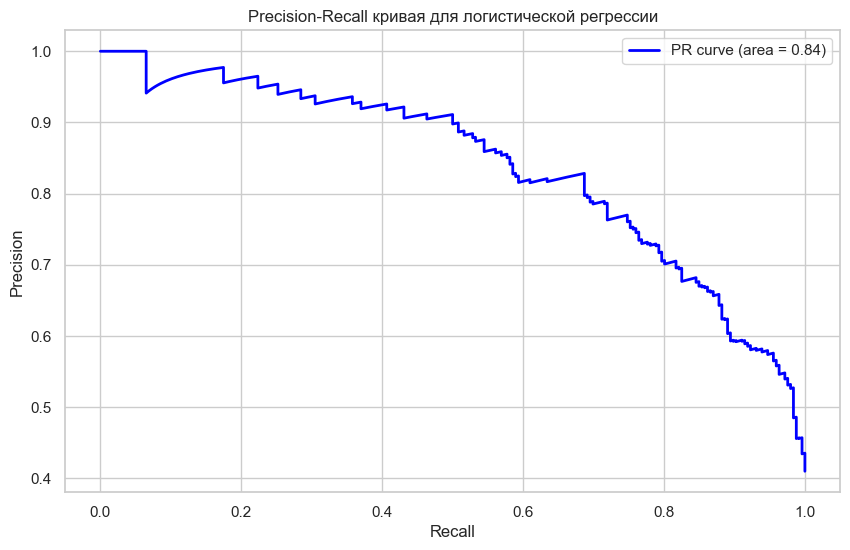

In [14]:
# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для логистической регрессии')
plt.legend(loc="lower right")
plt.savefig('figures/roc_curve.png', bbox_inches='tight', dpi=300)
plt.show()

# Построение PR-кривой
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc_value = auc(recall, precision)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc_value:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall кривая для логистической регрессии')
plt.legend(loc="upper right")
plt.savefig('figures/precision_recall_curve.png', bbox_inches='tight', dpi=300)
plt.show()

## 5. Сравнение бейзлайна и логистической регрессии, текстовые выводы

Сравнение моделей

In [16]:
models_comparison = pd.DataFrame({
    'Модель': ['Бейзлайн (DummyClassifier)', 'Логистическая регрессия'],
    'Accuracy': [dummy_accuracy, accuracy],
    'ROC-AUC': [dummy_roc_auc, roc_auc],
    'Precision (класс 1)': [0.0, 0.79],
    'Recall (класс 1)': [0.0, 0.69],
    'F1-score (класс 1)': [0.0, 0.74]
})

print("Сравнение моделей:")
print(models_comparison.round(4))
print()

print("1. Сравнение бейзлайна и логистической регрессии:")
print(f"    Accuracy выросла с {dummy_accuracy:.4f} до {accuracy:.4f} (+{accuracy-dummy_accuracy:.4f})")
print(f"    ROC-AUC вырос с {dummy_roc_auc:.4f} до {roc_auc:.4f} (+{roc_auc-dummy_roc_auc:.4f})")
print(f"    Модель теперь находит {170} из {246} дефолтов (Recall = {0.69:.2f})")
print(f"    Точность предсказаний для класса 1 (дефолты) составляет {0.79:.2f}")
print()

print("2. Влияние параметра регуляризации C:")
print("     Лучшее значение C = 10.0")
print("     При C = 0.01 и C = 0.1 модель была недостаточно обучена (низкая способность к обучению)")
print("     При C = 1.0 и C = 10.0 модель показала лучшие результаты")
print("     C = 10.0 обеспечило оптимальный баланс между смещением и разбросом")
print()

print("3. Анализ ошибок модели:")
print(f"    Ложноположительные срабатывания (FP): {44}")
print(f"    Ложноотрицательные срабатывания (FN): {76}")
print("     Ложноотрицательные срабатывания (пропущенные дефолты) более критичны")
print("     Можно попробовать снизить порог классификации для повышения recall")
print()

print("4. Рекомендации по улучшению модели:")
print("     Добавить полиномиальные признаки для захвата нелинейных зависимостей")
print("     Попробовать более сложные модели (Random Forest, Gradient Boosting)")
print("     Сделать undersampling/oversampling для улучшения баланса классов")
print("     Настроить порог классификации для оптимизации бизнес-метрик")
print("     Добавить новые признаки (например, отношение дохода к кредиту)")
print()

print("5. Заключение:")
print("     Логистическая регрессия значительно превосходит бейзлайн")
print("     Модель демонстрирует хорошую способность к предсказанию дефолтов")
print(f"    ROC-AUC = {roc_auc:.4f} указывает на очень хорошее качество модели")
print("     Можно использовать эту модель как отправную точку для дальнейшего улучшения")

Сравнение моделей:
                       Модель  Accuracy  ROC-AUC  Precision (класс 1)  \
0  Бейзлайн (DummyClassifier)      0.59   0.5000                 0.00   
1     Логистическая регрессия      0.80   0.8756                 0.79   

   Recall (класс 1)  F1-score (класс 1)  
0              0.00                0.00  
1              0.69                0.74  

1. Сравнение бейзлайна и логистической регрессии:
    Accuracy выросла с 0.5900 до 0.8000 (+0.2100)
    ROC-AUC вырос с 0.5000 до 0.8756 (+0.3756)
    Модель теперь находит 170 из 246 дефолтов (Recall = 0.69)
    Точность предсказаний для класса 1 (дефолты) составляет 0.79

2. Влияние параметра регуляризации C:
     Лучшее значение C = 10.0
     При C = 0.01 и C = 0.1 модель была недостаточно обучена (низкая способность к обучению)
     При C = 1.0 и C = 10.0 модель показала лучшие результаты
     C = 10.0 обеспечило оптимальный баланс между смещением и разбросом

3. Анализ ошибок модели:
    Ложноположительные срабатывания (F